In [1]:
import requests
import copy
import datetime
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/rajasekhard/Downloads/Memory_usage_by_pod.csv")


In [3]:
df['Time'] = df['Time'].astype('datetime64[ns]')
df1 = df[['Time', 'Point']]
df1 = df1[np.isfinite(df).all(1)]

In [4]:
df1.head()

,Time,Point
0,2022-01-24 04:42:00,37.821113
1,2022-01-24 04:44:00,37.845812
2,2022-01-24 04:46:00,37.886433
3,2022-01-24 04:48:00,37.836587
4,2022-01-24 04:50:00,37.857790


In [5]:
df1

,Time,Point
0,2022-01-24 04:42:00,37.821113
1,2022-01-24 04:44:00,37.845812
2,2022-01-24 04:46:00,37.886433
3,2022-01-24 04:48:00,37.836587
4,2022-01-24 04:50:00,37.857790
...,...,...
51273,2022-01-24 16:36:00,8.958521
51274,2022-01-24 16:38:00,8.944848
51275,2022-01-24 16:40:00,8.934473
51276,2022-01-24 16:42:00,8.913942


In [6]:
df1=df1.reset_index()


In [7]:
df1 = df1.rename(columns={'Point': 'y', 'Time':'ds'})

In [8]:
df1.head()

,index,ds,y
0,0,2022-01-24 04:42:00,37.821113
1,1,2022-01-24 04:44:00,37.845812
2,2,2022-01-24 04:46:00,37.886433
3,3,2022-01-24 04:48:00,37.836587
4,4,2022-01-24 04:50:00,37.857790


In [9]:
df1.replace([np.inf, -np.inf], np.nan).dropna(subset=["ds", "y"], how="all")
df1.replace([np.inf, -np.inf], np.nan)

,index,ds,y
0,0,2022-01-24 04:42:00,37.821113
1,1,2022-01-24 04:44:00,37.845812
2,2,2022-01-24 04:46:00,37.886433
3,3,2022-01-24 04:48:00,37.836587
4,4,2022-01-24 04:50:00,37.857790
...,...,...,...
51273,51273,2022-01-24 16:36:00,8.958521
51274,51274,2022-01-24 16:38:00,8.944848
51275,51275,2022-01-24 16:40:00,8.934473
51276,51276,2022-01-24 16:42:00,8.913942


In [10]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [11]:
df1['y_orig'] = df1['y']# to save a copy of the original data..we'll see why shortly. 
df1['y'] = np.log(df1['y'])

In [12]:
df1.tail()

,index,ds,y,y_orig
51273,51273,2022-01-24 16:36:00,2.192605,8.958521
51274,51274,2022-01-24 16:38:00,2.191078,8.944848
51275,51275,2022-01-24 16:40:00,2.189917,8.934473
51276,51276,2022-01-24 16:42:00,2.187617,8.913942
51277,51277,2022-01-24 16:44:00,2.185021,8.890834


In [13]:
model = Prophet() #instantiate Prophet

In [14]:
model.fit(df1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future_data = model.make_future_dataframe(periods=10, freq = 'H')
future_data.tail(15)

,ds
357,2022-01-24 16:36:00
358,2022-01-24 16:38:00
359,2022-01-24 16:40:00
360,2022-01-24 16:42:00
361,2022-01-24 16:44:00
362,2022-01-24 17:44:00
363,2022-01-24 18:44:00
364,2022-01-24 19:44:00
365,2022-01-24 20:44:00
366,2022-01-24 21:44:00


In [16]:
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
357,2022-01-24 16:36:00,2.718500,1.587399,3.833567
358,2022-01-24 16:38:00,2.719297,1.659252,3.760424
359,2022-01-24 16:40:00,2.720094,1.690055,3.796150
360,2022-01-24 16:42:00,2.720891,1.709560,3.892944
361,2022-01-24 16:44:00,2.721688,1.555808,3.821223
362,2022-01-24 17:44:00,2.745592,1.697028,3.824955
363,2022-01-24 18:44:00,2.769496,1.684364,3.828094
364,2022-01-24 19:44:00,2.793400,1.750062,3.848029
365,2022-01-24 20:44:00,2.817305,1.740247,3.951298
366,2022-01-24 21:44:00,2.841209,1.759328,3.936262


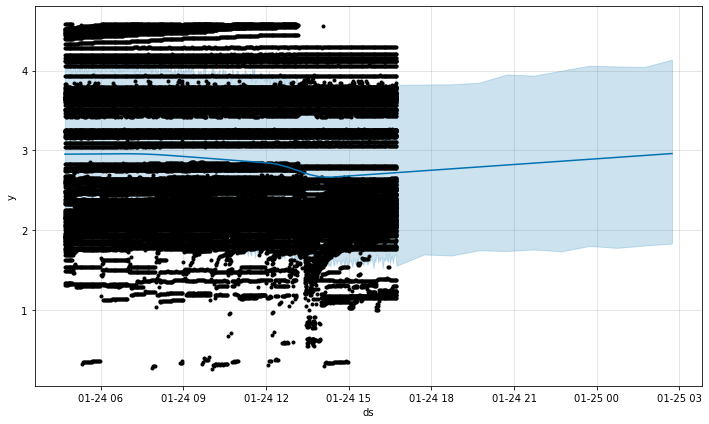

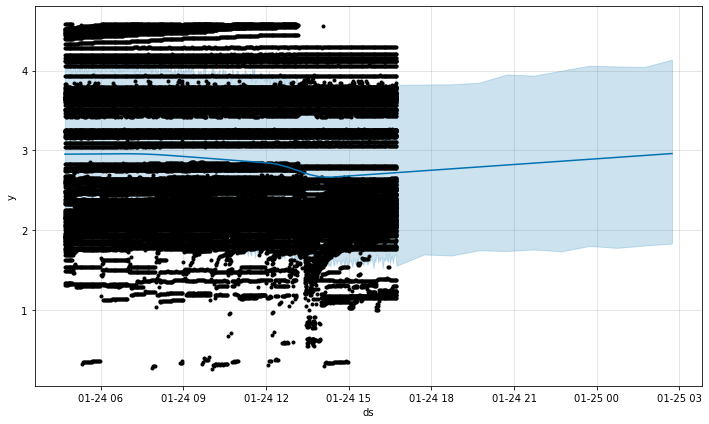

In [17]:
model.plot(forecast_data)

In [18]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

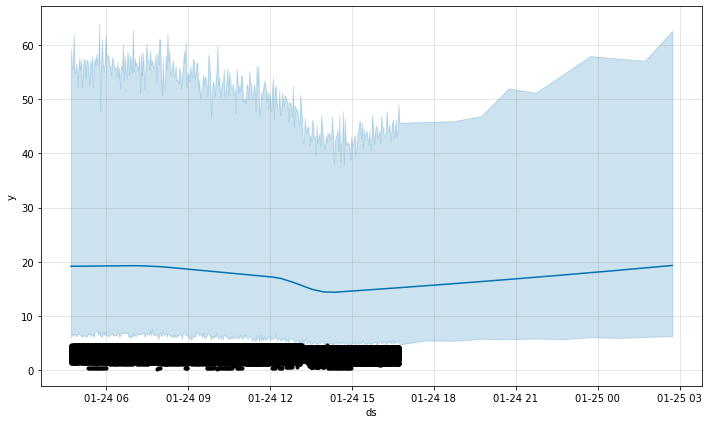

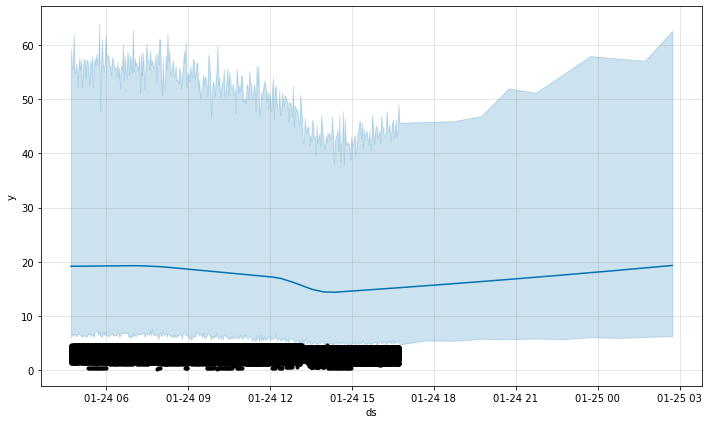

In [19]:
model.plot(forecast_data_orig)

In [20]:
df1['y_log']=df1['y'] #copy the log-transformed data to another column
df1['y']=df1['y_orig']

In [21]:
final_df = pd.DataFrame(forecast_data_orig)

In [22]:
import plotly.graph_objs as go
import plotly.offline as py

In [26]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df1["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)

'temp-plot.html'